In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from os import write
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from ResnetModels import ResNet, ResNet50

In [3]:
def load_history(history_dir):
    data = {}
    with open(history_dir) as infile:
        data = json.load(infile)
    return data
def smooth_data(x, kernel=5):
    ret_val = []
    pad = (kernel - 1) / 2
    pad = int(pad)
    base, append = [0]*pad, [0]*pad
    base.extend(x)
    base.extend(append)
    for i in range(pad, len(base)-pad):
        low, high = i - pad, i + pad + 1
        count = 0
        subsequence = base[low:high]
        for s in subsequence:
            if s > 0:
                count += 1
        s = np.sum(subsequence)
        ret_val.append(s/count)
    return ret_val

In [4]:
orig_reg = load_history('results/resnet50_no_l2_100eps.json')
orig_l2 = load_history('results/resnet50_l2.json')
cont_sch = load_history('results/resnet50_cont_sch.json')
steps = [1, 5, 10, 20]
sch_data = []
schl2_data = []
sch_stys = ['r--', 'g--', 'b--', 'c--']
schl2_stys = ['r-', 'g-', 'b-', 'c-']
sch_stem = 'results/sch_'
l2_stem = 'results/sch_l2_'
for step in steps:
    sch_dir = sch_stem + str(step) + '.json'
    l2_dir = l2_stem + str(step) + '.json'
    sch_data.append(load_history(sch_dir))
    schl2_data.append(load_history(l2_dir))

In [14]:
print(data.keys())

dict_keys(['loss', 'acc'])


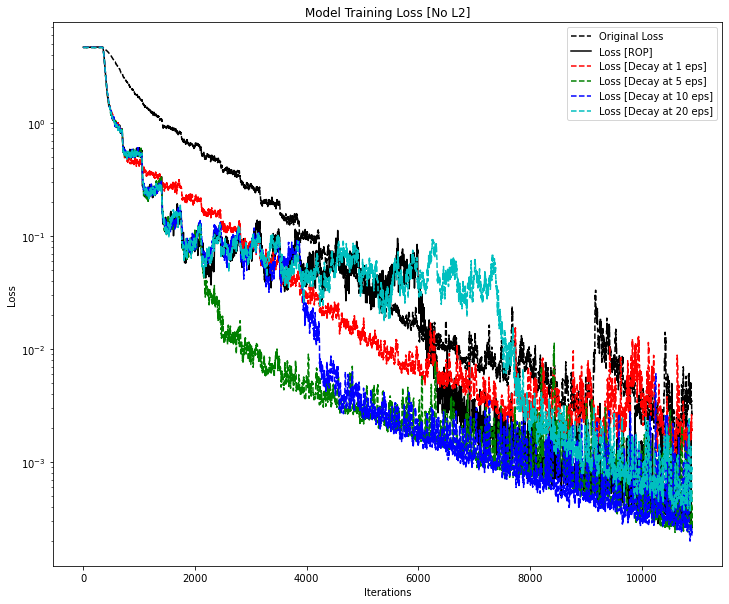

In [24]:
plt.figure(figsize=(12, 10))
plt.title('Model Training Loss [No L2]')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')

# Plot original
data, sty = orig_reg, 'k--'
plot_data = smooth_data(data['loss']['train_iter'], kernel=15)[0:10900]
num_points = len(plot_data)
plt.plot(range(num_points), plot_data, sty, label=f'Original Loss')

# Plot ROP
data, sty = cont_sch, 'k-'
plot_data = smooth_data(data['loss']['train_iter'], kernel=11)[0:10900]
num_points = len(plot_data)
plt.plot(range(num_points), plot_data, sty, label=f'Loss [ROP]')

for i in range(len(sch_data)):
    data, sty, step = sch_data[i], sch_stys[i], steps[i]
    plot_data = smooth_data(data['loss']['train_iter'], kernel=15)[0:10900]
    num_points = len(plot_data)
    plt.plot(range(num_points), plot_data, sty, label=f'Loss [Decay at {step} eps]')
plt.legend()
plt.show()

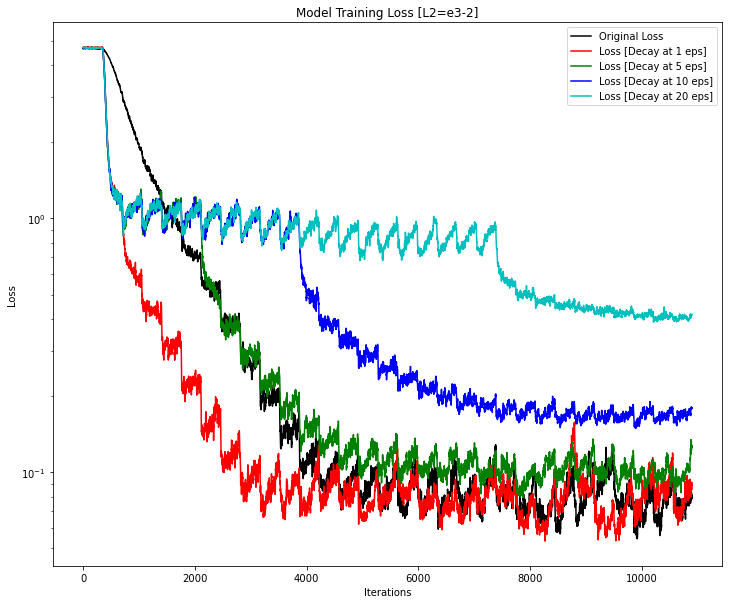

In [65]:
plt.figure(figsize=(12, 10))
plt.title('Model Training Loss [L2=e3-2]')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')

# Plot original
data, sty = orig_l2, 'k-'
plot_data = smooth_data(data['loss']['train_iter'], kernel=11)[0:10900]
num_points = len(plot_data)
plt.plot(range(num_points), plot_data, sty, label=f'Original Loss')

for i in range(len(sch_data)):
    data, sty, step = schl2_data[i], schl2_stys[i], steps[i]
    plot_data = smooth_data(data['loss']['train_iter'], kernel=11)[0:10900]
    test_data = smooth_data(data['loss']['test_iter'], kernel=11)[0:10900]
    num_points = len(plot_data)
    plt.plot(range(num_points), plot_data, sty, label=f'Loss [Decay at {step} eps]')
plt.legend()
plt.show()

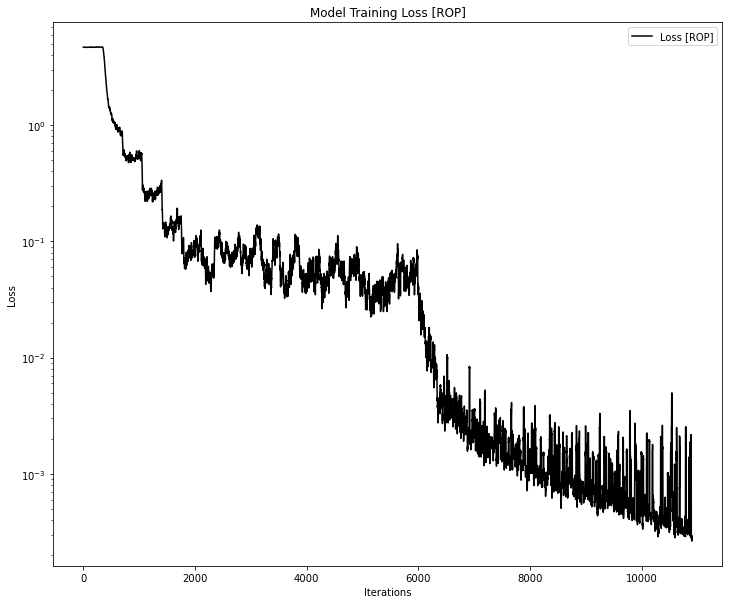

In [7]:
plt.figure(figsize=(12, 10))
plt.title('Model Training Loss [ROP]')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')

# Plot ROP
data, sty = cont_sch, 'k-'
plot_data = smooth_data(data['loss']['train_iter'], kernel=11)[0:10900]
num_points = len(plot_data)
plt.plot(range(num_points), plot_data, sty, label=f'Loss [ROP]')
plt.legend()
plt.show()

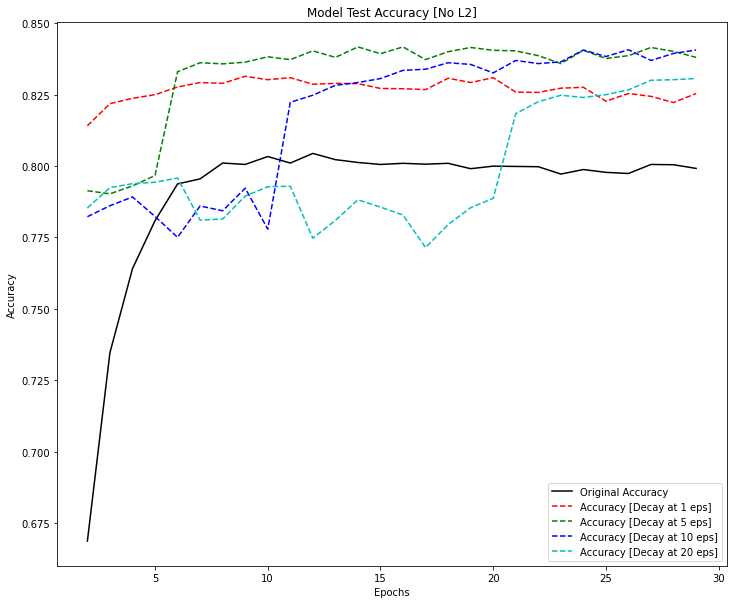

In [27]:
# train_acc = data['acc']['train'][0:30]
plt.figure(figsize=(12, 10))
plt.title('Model Test Accuracy [No L2]')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot original
data, sty = orig_reg, 'k-'
plot_data = data['acc']['test'][2:30]
num_points = len(plot_data)
plt.plot(range(2, 30), plot_data, sty, label=f'Original Accuracy')

for i in range(len(sch_data)):
    data, sty, step = sch_data[i], sch_stys[i], steps[i]
    test_acc = data['acc']['test'][2:30]
    num_points = len(test_acc)
    plt.plot(range(2, 30), test_acc, sty, label=f'Accuracy [Decay at {step} eps]')
plt.legend()
plt.show()

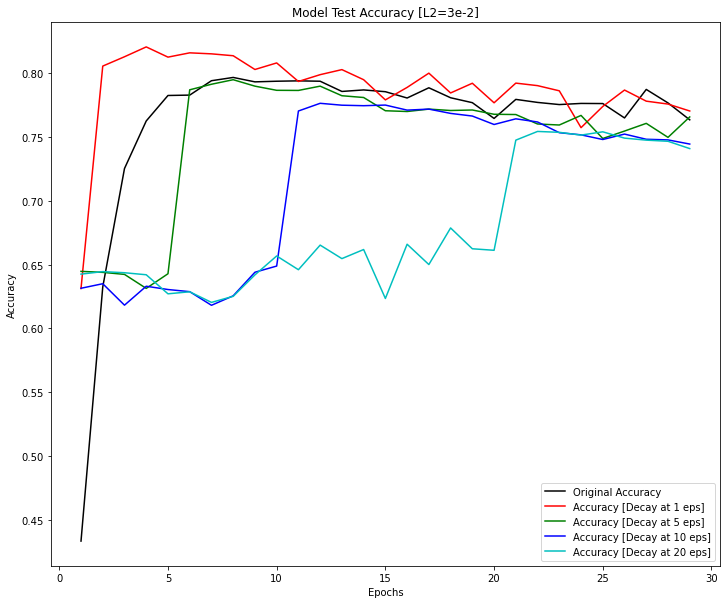

In [38]:
# train_acc = data['acc']['train'][0:30]
plt.figure(figsize=(12, 10))
plt.title('Model Test Accuracy [L2=3e-2]')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot original
data, sty = orig_l2, 'k-'
plot_data = data['acc']['test'][1:30]
num_points = len(plot_data)
plt.plot(range(1, 30), plot_data, sty, label=f'Original Accuracy')

for i in range(len(sch_data)):
    data, sty, step = schl2_data[i], schl2_stys[i], steps[i]
    test_acc = data['acc']['test'][1:30]
    num_points = len(test_acc)
    plt.plot(range(1, 30), test_acc, sty, label=f'Accuracy [Decay at {step} eps]')
plt.legend()
plt.show()

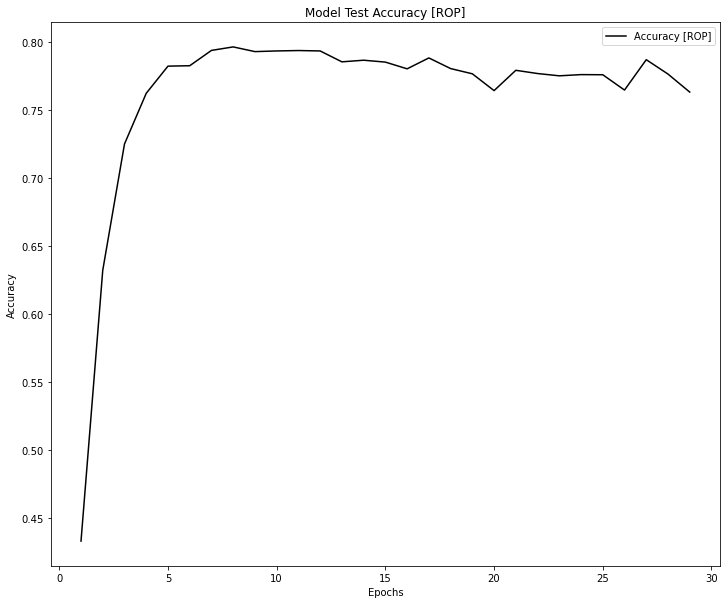

In [8]:
# train_acc = data['acc']['train'][0:30]
plt.figure(figsize=(12, 10))
plt.title('Model Test Accuracy [ROP]')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot original
data, sty = orig_l2, 'k-'
plot_data = data['acc']['test'][1:30]
num_points = len(plot_data)
plt.plot(range(1, 30), plot_data, sty, label=f'Accuracy [ROP]')
plt.legend()
plt.show()

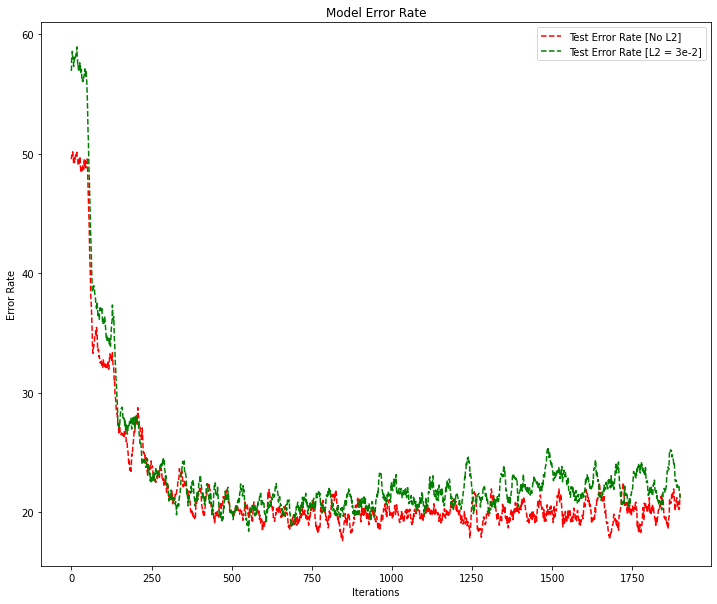

In [9]:
# train_acc = data['acc']['train'][0:30]
orig_data = orig_reg
data = orig_l2
test_acc = smooth_data((1-np.array(data['acc']['test_iter'][100:2000]))*100, kernel=17)
test_acc_orig = smooth_data((1-np.array(orig_data['acc']['test_iter'][100:2000]))*100, kernel=17)
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.plot(range(num_points), test_acc_orig, 'r--', label='Test Error Rate [No L2]')
plt.plot(range(num_points), test_acc, 'g--', label='Test Error Rate [L2 = 3e-2]')
plt.legend()
plt.show()

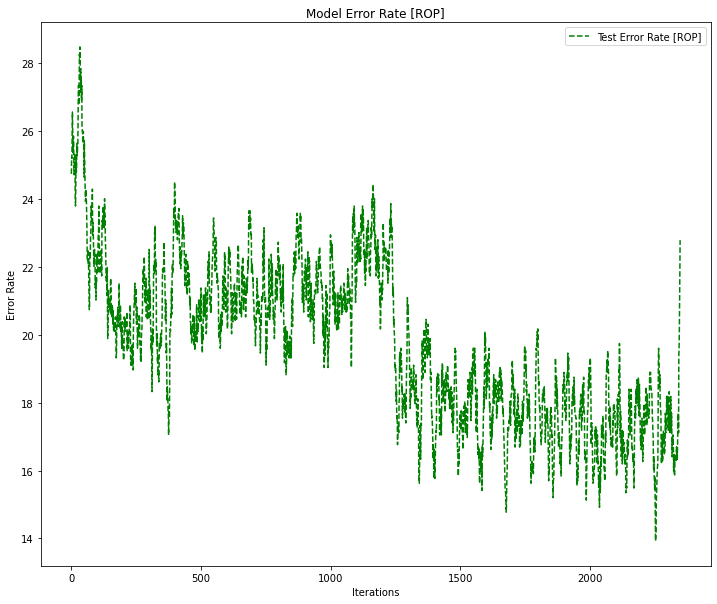

In [18]:
data = cont_sch
test_acc = smooth_data((1-np.array(data['acc']['test_iter'][100:]))*100, kernel=11)
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate [ROP]')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.plot(range(num_points), test_acc, 'g--', label='Test Error Rate [ROP]')
plt.legend()
plt.show()

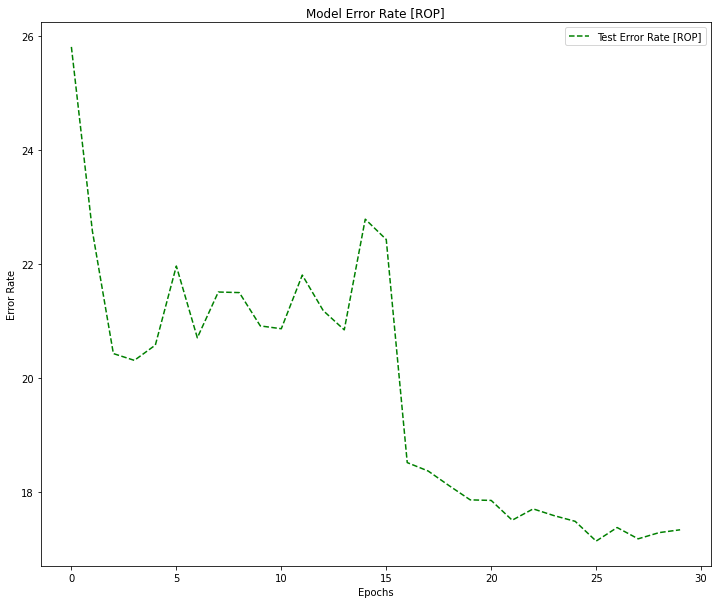

In [23]:
data = cont_sch
test_acc = smooth_data((1-np.array(data['acc']['test'][1:]))*100, kernel=1)
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate [ROP]')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.plot(range(num_points), test_acc, 'g--', label='Test Error Rate [ROP]')
plt.legend()
plt.show()

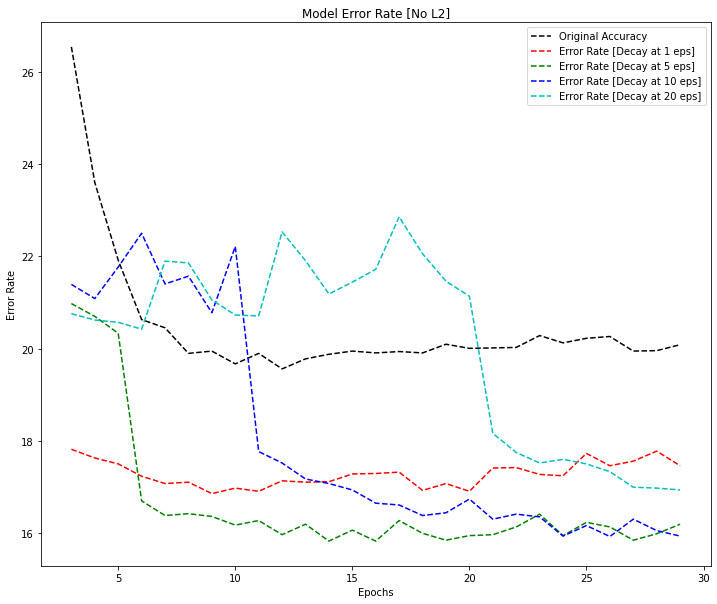

In [61]:
# train_acc = data['acc']['train'][0:30]
start_point = 3
end_point = 30
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate [No L2]')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')

# Plot original
data, sty = orig_reg, 'k--'
plot_data = smooth_data((1-np.array(data['acc']['test'][start_point:end_point]))*100, kernel=1)
num_points = len(plot_data)
plt.plot(range(start_point, end_point), plot_data, sty, label=f'Original Accuracy')

for i in range(len(sch_data)):
    data, sty, step = sch_data[i], sch_stys[i], steps[i]
    test_acc = smooth_data((1-np.array(data['acc']['test'][start_point:end_point]))*100, kernel=1)
    num_points = len(test_acc)
    plt.plot(range(start_point, end_point), test_acc, sty, label=f'Error Rate [Decay at {step} eps]')
plt.legend()
plt.show()

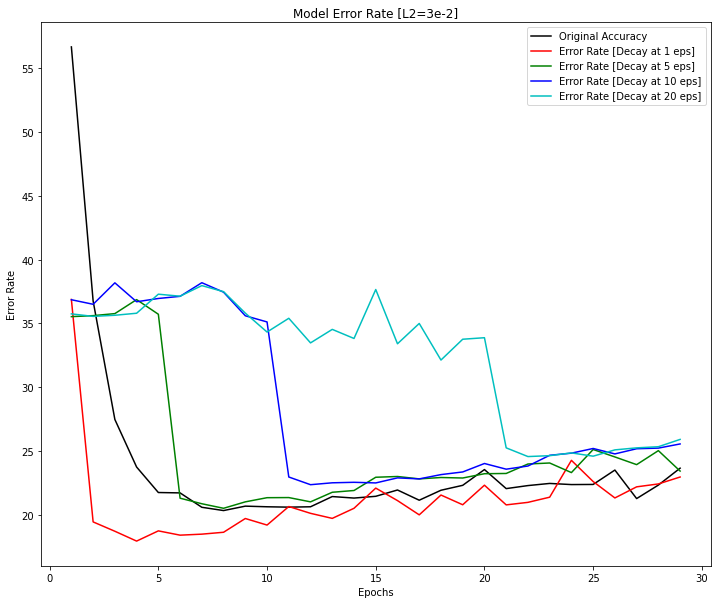

In [62]:
# train_acc = data['acc']['train'][0:30]
start_point = 1
end_point = 30
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate [L2=3e-2]')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')

# Plot original
data, sty = orig_l2, 'k-'
plot_data = smooth_data((1-np.array(data['acc']['test'][start_point:end_point]))*100, kernel=1)
num_points = len(plot_data)
plt.plot(range(start_point, end_point), plot_data, sty, label=f'Original Accuracy')

for i in range(len(sch_data)):
    data, sty, step = schl2_data[i], schl2_stys[i], steps[i]
    test_acc = smooth_data((1-np.array(data['acc']['test'][start_point:end_point]))*100, kernel=1)
    num_points = len(test_acc)
    plt.plot(range(start_point, end_point), test_acc, sty, label=f'Error Rate [Decay at {step} eps]')
plt.legend()
plt.show()

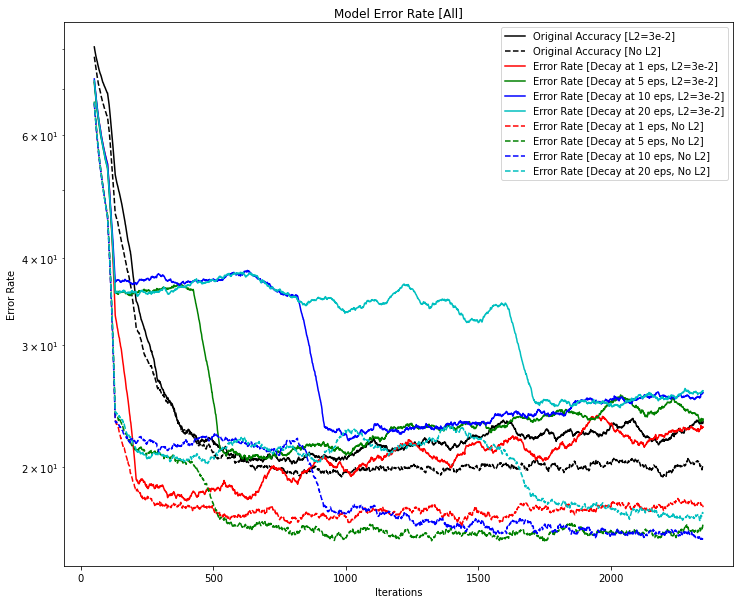

In [32]:
# train_acc = data['acc']['train'][0:30]
start_point = 50
end_point = 2350
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate [All]')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.yscale('log')
data_freq = 'test_iter'
k_size = 101

# Plot original
data, sty = orig_l2, 'k-'
plot_data = smooth_data((1-np.array(data['acc'][data_freq][start_point:end_point]))*100, kernel=k_size)
num_points = len(plot_data)
plt.plot(range(start_point, end_point), plot_data, sty, label=f'Original Accuracy [L2=3e-2]')

# Plot original
data, sty = orig_reg, 'k--'
plot_data = smooth_data((1-np.array(data['acc'][data_freq][start_point:end_point]))*100, kernel=k_size)
num_points = len(plot_data)
plt.plot(range(start_point, end_point), plot_data, sty, label=f'Original Accuracy [No L2]')

for i in range(len(sch_data)):
    data, sty, step = schl2_data[i], schl2_stys[i], steps[i]
    test_acc = smooth_data((1-np.array(data['acc'][data_freq][start_point:end_point]))*100, kernel=k_size)
    num_points = len(test_acc)
    plt.plot(range(start_point, end_point), test_acc, sty, label=f'Error Rate [Decay at {step} eps, L2=3e-2]')

for i in range(len(sch_data)):
    data, sty, step = sch_data[i], sch_stys[i], steps[i]
    test_acc = smooth_data((1-np.array(data['acc'][data_freq][start_point:end_point]))*100, kernel=k_size)
    num_points = len(test_acc)
    plt.plot(range(start_point, end_point), test_acc, sty, label=f'Error Rate [Decay at {step} eps, No L2]')
plt.legend()
plt.show()